In [1]:
import numpy as np, matplotlib.pyplot as plt
from scipy.fftpack import fft, fftfreq

In [2]:
plt.rc("figure", figsize=(10,7))

In [3]:
def fun(t,f):
    return np.sin(2*np.pi*f*t) - 1/2*np.sin(2*np.pi*2*f*t) - 1/2*np.sin(2*np.pi*f/4*t)

In [4]:
f = 400
ns = 16
T = 1/f
dt = T/ns

In [5]:
def make_ftt_plot(t):
    fig = plt.figure(figsize=(15,5))
    axf = fig.add_subplot(121)

    axf.plot(t,fun(t,f),'k-')
    axf.plot(t,fun(t,f),'ro')

    ln = len(t)
    axfft = fig.add_subplot(122)
    Y1 = fft(fun(t,f))/ln
    F1 = fftfreq(ln,dt)

    I = True
    I = F1 >=0 # Only plot positive freq.
    axfft.vlines(F1[I], 0, np.abs(Y1[I]))
    axfft.set_ylim(0, .5)
    axfft.set_xlabel("Frequency [Hz]")
    axfft.set_ylabel("Amplitude")

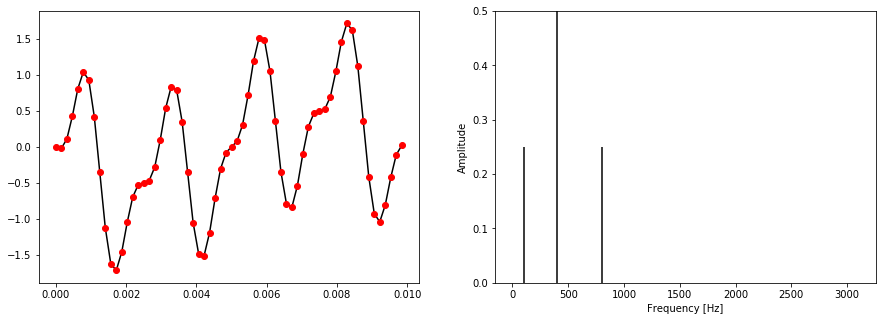

In [6]:
t=np.linspace(0, dt*(ns*4-1), ns*4)
make_ftt_plot(t)

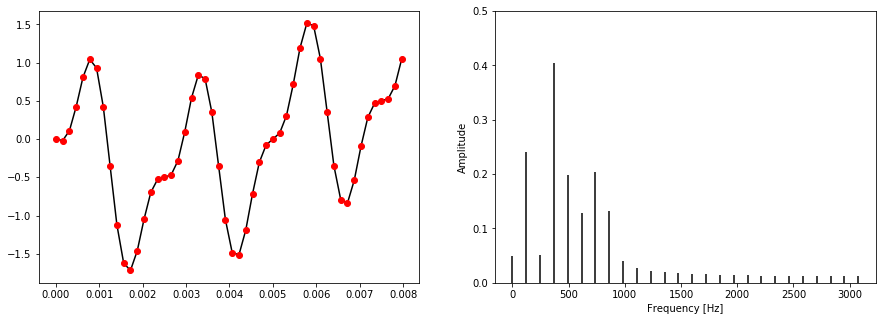

In [7]:
t=np.linspace(0, dt*(ns*3.25-1), int(ns*3.25))

make_ftt_plot(t)

In [8]:
fft?

Signature: fft(x, n=None, axis=-1, overwrite_x=False)
Docstring:
Return discrete Fourier transform of real or complex sequence.

The returned complex array contains ``y(0), y(1),..., y(n-1)`` where

``y(j) = (x * exp(-2*pi*sqrt(-1)*j*np.arange(n)/n)).sum()``.

Parameters
----------
x : array_like
    Array to Fourier transform.
n : int, optional
    Length of the Fourier transform.  If ``n < x.shape[axis]``, `x` is
    truncated.  If ``n > x.shape[axis]``, `x` is zero-padded. The
    default results in ``n = x.shape[axis]``.
axis : int, optional
    Axis along which the fft's are computed; the default is over the
    last axis (i.e., ``axis=-1``).
overwrite_x : bool, optional
    If True, the contents of `x` can be destroyed; the default is False.

Returns
-------
z : complex ndarray
    with the elements::

        [y(0),y(1),..,y(n/2),y(1-n/2),...,y(-1)]        if n is even
        [y(0),y(1),..,y((n-1)/2),y(-(n-1)/2),...,y(-1)]  if n is odd

    where::

        y(j) = sum[k=0..n-1]

In [9]:
fftfreq?

Signature: fftfreq(n, d=1.0)
Docstring:
Return the Discrete Fourier Transform sample frequencies.

The returned float array `f` contains the frequency bin centers in cycles
per unit of the sample spacing (with zero at the start).  For instance, if
the sample spacing is in seconds, then the frequency unit is cycles/second.

Given a window length `n` and a sample spacing `d`::

  f = [0, 1, ...,   n/2-1,     -n/2, ..., -1] / (d*n)   if n is even
  f = [0, 1, ..., (n-1)/2, -(n-1)/2, ..., -1] / (d*n)   if n is odd

Parameters
----------
n : int
    Window length.
d : scalar, optional
    Sample spacing (inverse of the sampling rate). Defaults to 1.

Returns
-------
f : ndarray
    Array of length `n` containing the sample frequencies.

Examples
--------
>>> signal = np.array([-2, 8, 6, 4, 1, 0, 3, 5], dtype=float)
>>> fourier = np.fft.fft(signal)
>>> n = signal.size
>>> timestep = 0.1
>>> freq = np.fft.fftfreq(n, d=timestep)
>>> freq
array([ 0.  ,  1.25,  2.5 ,  3.75, -5.  , -3.75, -2.5 , 